# INTRODUCTION

**INTRODUCTION**

Obesity is strongly associated with multiple risk factors. There are various challenges to better understand the association between risk factors and the occurrence of obesity so the aim of this notebook is to perform **Structure and Content Discovery**  on dataset of obesity level in  Mexico,Peru and Colombia

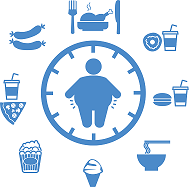





**1.Importing the required Libraries**

 a) Numpy -: for numerical operations. b) pandas -: for creating dataframe out of csv, as by reading a csv file. c) seaborn -: for graphical representations. d) matplotlib -: for graphical representations.






In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 



**2. Loading the Dataset**

 a) As we are using google colab first we have to mount the drive by running the
 command below then b) we have to read csv file uisng pd.read_csv function  c)then to cehck if data is loaded properly we have used data.head to display the top data entries in our dataset





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ig/ObesityDataSet_raw_and_data_sinthetic.csv')

In [ ]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


# Data Analysis

**3.Data Analysis**

Now here comes the fun part lets take a deep dive into the Data




Here we will get the basic info about the data As we can see there are 17 columns here with 2111 entries in total .The data type of the columns are also mentioned here which comes in very handy while performing operations upon specific columns

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

There are two classes of data: Qualitative and Quantitative data, which are further classified into four types: a)nominal(ex-gender) b)ordinal(Ex-Calc column) c)discrete (Ex-Age) d) Continuous(Ex-weight).

**3.1 Checking for null values** 

The function is null returns true if null value found 

In [ ]:
data[data.isnull().any(axis=1)]


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad


Another methood for checking null values is by drawing Heatmap 
Heatmap depicts density of particular value where the value is depicted from colour its a very strong visualisation methood which comes very handy
The null values in the columnns can be diplayed by heatmap using sns heatmap function.It is quite useful while lokking for frequncy of null values in difrrent columns of our datset.**Luckily we dont have any null values here**

Text(0.5, 1.0, 'Missing values Heatmap')

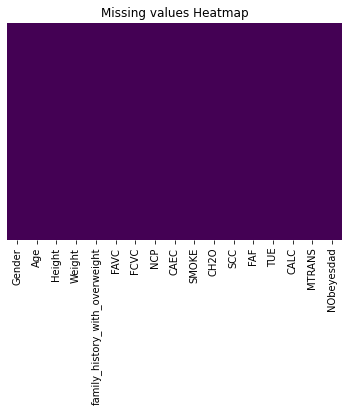

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis').set_title("Missing values Heatmap")
#heatmap to display null values

**3.2 Did you Know that basic data description can tell us a lot of story about data**

So here we will use describe function to get  bascs stats about the data

In [ ]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


As we can see some important features in data like mean age in our data is 24 similarly we can also check mean max and min values of other quantative data

**3.3 Converting catogerical values to catogery and rounding of float values to int for further analyis.**

Basically its a good practice as it makes our task easier





In many  Data Science activities, the data set might contain text or categorical values (basically non-numerical values) **examples here are:- Gender,Is the person smoker or not?**

So we can easily train our model on the above catogerical data but wait there is a catch how would our model diffrentitae between the catogerical data for example how would model understand the difrrence between M and F category Well thats the difficult part here! Which makes our model difficult to train but honestly speaking its not that difficult and you will soon learn it as one thing you would notice that most of the algorithms work better with numerical inputs. Therefore, the main challenge faced by an analyst is to convert text/categorical data into numerical data and still make an algorithm/model to make sense out of it.

There are many ways to convert categorical values into numerical values. Hereby, I would focus on 2 main methods: One-Hot-Encoding and Label-Encoder

**Label Encoding**
This approach is very simple and it involves converting each value in a column to a number.
Example:- Male as 0 and Female as 1
Though label encoding is straight but it has the disadvantage that the numeric values can be misinterpreted by algorithms as having some sort of hierarchyorder in them. This ordering issue is addressed in another common alternative approach called ‘One-Hot Encoding’

**One-Hot Encoder**
.
Here Data is encoded as using combination of diffrent 0 and 1 where each combination is used to refer to specific category this methood help us to eliminate the issue which arises due to ordering of the features while using the Label Encoding

In [ ]:
columns = ["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS", "NObeyesdad"]
for col in columns:
    data[col] = data[col].astype('category')


In [ ]:
columns = ["FCVC", "NCP", "CH2O", "TUE", "FAF"]
for col in columns:
    data[col] = round(data[col]).astype('int')  #converting float values to int

In [ ]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
obesity_dummies = pd.get_dummies(data[["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS"]])

Get dummies function is used to obtain label encoder for the catogeries of our pandas dataframe

In [ ]:
obesity_lab = data[["NObeyesdad"]]  #sepearing the dependent variable as we would need it later 


In [ ]:
data.describe() #checking the min,max ,mean of all the values

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.423496,2.687826,2.014685,1.006632,0.664614
std,6.345968,0.093305,26.191172,0.583905,0.809680,0.688616,0.895462,0.674009
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,3.000000,2.000000,0.000000,0.000000
50%,22.777890,1.700499,83.000000,2.000000,3.000000,2.000000,1.000000,1.000000
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.000000,2.000000,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Gender                          2111 non-null   category
 1   Age                             2111 non-null   float64 
 2   Height                          2111 non-null   float64 
 3   Weight                          2111 non-null   float64 
 4   family_history_with_overweight  2111 non-null   category
 5   FAVC                            2111 non-null   category
 6   FCVC                            2111 non-null   int64   
 7   NCP                             2111 non-null   int64   
 8   CAEC                            2111 non-null   category
 9   SMOKE                           2111 non-null   category
 10  CH2O                            2111 non-null   int64   
 11  SCC                             2111 non-null   category
 12  FAF                 

As it can be seen above the data type of catogerical variable has been changed from before and respecive float values are also replaced with int

**3.4 Plotting the graphs**

Here using seaborn we would count plot diffrent variables to understand their behaviour and distribution

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


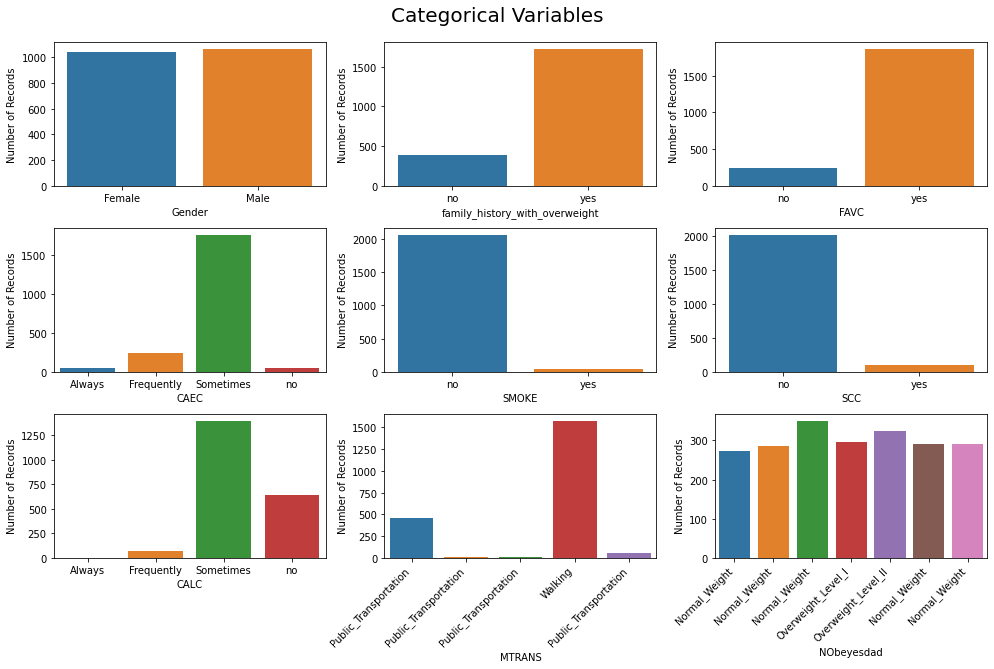

In [ ]:
# columns of interest
columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
           'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for col, subplot in zip(columns, ax.flatten()):
    sns.countplot(data[col], ax=subplot)
    
    if col=="MTRANS":
        sns.countplot(data[col],ax=subplot)
        subplot.set_xticklabels(rotation=45, horizontalalignment='right', labels=data.MTRANS)        
        subplot.yaxis.label.set_text("Number of Records")
    elif col=="NObeyesdad":
        sns.countplot(data[col],ax=subplot)
        subplot.set_xticklabels(rotation=45, horizontalalignment='right', labels=data.NObeyesdad)  
        subplot.yaxis.label.set_text("Number of Records")
    else:
        sns.countplot(data[col],ax=subplot)  
        subplot.yaxis.label.set_text("Number of Records")
        
# show figure & plots
fig.suptitle("Categorical Variables", fontsize=20)
plt.tight_layout(pad=5, w_pad=0.0, h_pad=1)
plt.show()

Catogerical Variable

**The categorical variables are not gaussian**
Most of the **categorical variables are bernoulli** in nature but what is a gaussian distribution and what is diffrence between gaussian distribution and Bernoulli distribution.Lets see
I bet You must have flipped a coin once in a while playing or betting so how cool it would  if you can guess the outcome in advance well its quite possible not completely  but partially

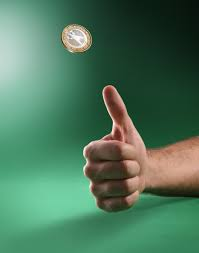


A Bernoulli distribution is a discrete distribution with only two possible values for the random variable. The distribution has only two possible outcomes and a single trial which is called a Bernoulli trial. The two possible outcomes in Bernoulli distribution are labeled by n=0 and n=1 in which n=1 (success) occurs with probability p and n=0 (failure) occurs with probability 1-p, and since it is a probability value so 0<=p<=1 so consider tossing a coin it can be heads(sucess) with probaility 1/2 or tail(failure) with probability(1/2)
and if we plot the graph for it for many trials combined we get a distribution
like mentioned below






The probability mass function (PMF) of a Bernoulli distribution is defined as:
If an experiment has only two possible outcomes, “success” and “failure,” and if p is the probability of success, thenP(n)=p^n(1-p)^(1-n). 

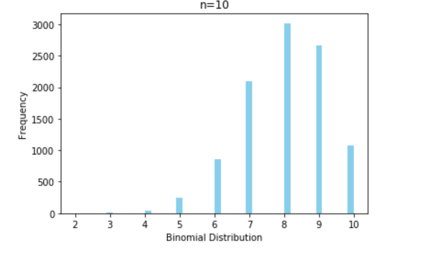




**Use Case of This distribution**

Think about a hospital emergency station.You are a hospital manager and you want to organize the staff numbers correctly for different weekdays. You know total number of patients came in to a emergency station because of alcohol poisoning in a given time period. You can analyse the distribution of patient numbers for each day of the week. Most likely you will have more such cases in the weekends and you need larger staff.

This will be also true for other businesses. They can use binomial distributions to calculate changes in demand and plan accordingly.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

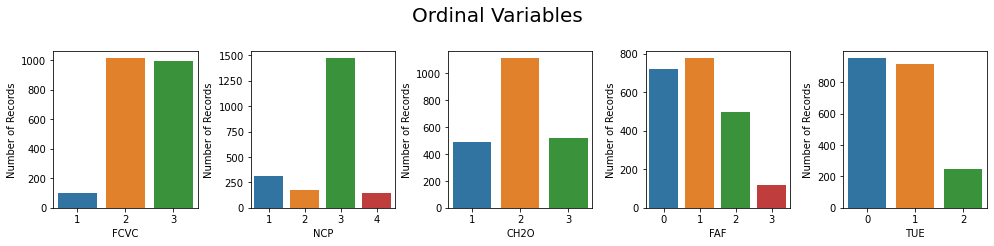

In [ ]:
# columns of interest
columns = ["FCVC", "NCP", "CH2O", "FAF", "TUE"]

fig, ax = plt.subplots(1, 5, figsize=(15, 4))
for col, subplot in zip(columns, ax.flatten()):
    sns.countplot(data[col], ax=subplot)
    subplot.yaxis.label.set_text("Number of Records")

# show figure & plots
fig.suptitle("Ordinal Variables", fontsize=20)
plt.tight_layout(pad=5, w_pad=0.7, h_pad=0.5)
plt.show()

**Ordinal values**

None of them are Gaussian distributed



In [ ]:
obesity_numeric = data[["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]]    #Extracring the numeric variables in seperate column


In [ ]:
obesity_concatenated = pd.concat([obesity_numeric, obesity_dummies, obesity_lab], axis = 1)   #concating the numerical variables and encoded dummy variables using the concat functiom


In [ ]:
obesity_concatenated.head()


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad
0,21.0,1.62,64.0,2,3,2,0,1,1,0,...,0,0,0,1,0,0,0,1,0,Normal_Weight
1,21.0,1.52,56.0,3,3,3,3,0,1,0,...,0,0,1,0,0,0,0,1,0,Normal_Weight
2,23.0,1.80,77.0,2,3,2,2,1,0,1,...,0,1,0,0,0,0,0,1,0,Normal_Weight
3,27.0,1.80,87.0,3,3,2,2,0,0,1,...,0,1,0,0,0,0,0,0,1,Overweight_Level_I
4,22.0,1.78,89.8,2,1,2,0,0,0,1,...,0,0,1,0,0,0,0,1,0,Overweight_Level_II


It can be clearly seen that Gender and other catogerical features are encoded using O and 1 

**3.5 Age Height and Weight Distribution`**

*It shows that age is not following gaussian distribution its Bernoulli distribution so data is spread in wide range*

*`The box plot denotes that age is not normaly distributed and we have many outliers as we can see many points outside the second standard deviation`*

In [ ]:
data["Age"].median() #This will simply give us the median age in the distribution


22.77789

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


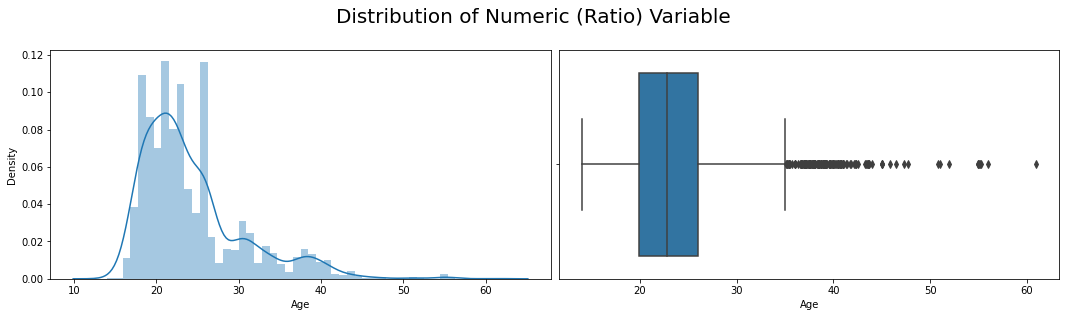

In [ ]:
fig = plt.figure(figsize = (16,5))

#distplot
ax1 = fig.add_subplot(121)
sns.distplot(data["Age"], kde=True)

#boxplot
ax1 = ax1 = fig.add_subplot(122)
sns.boxplot(data.Age)

# show figure & plots
fig.suptitle("Distribution of Numeric (Ratio) Variable", fontsize=20)
plt.tight_layout(pad=5, w_pad=0.5, h_pad=.1)
plt.show()

We see that age is uniformly distributed in begining of the data but what is the reason behind such unqiue shape of the age distribution as the age increases  and what are the significance of outliers here?

Well as we can see that maximum density of age is around 20 -30 years of age this is the range where most of the people suffer with obesity in the given dataset 

Obesity is determined by computing the Body mass index. It is a function of person's height and weight. The exact formula is BMI=Weight/height*height. Thus, height is an important element for determining obesity.

Distribution of height values is plotted below. Most people are 1.60 m - 1.85 m tall. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


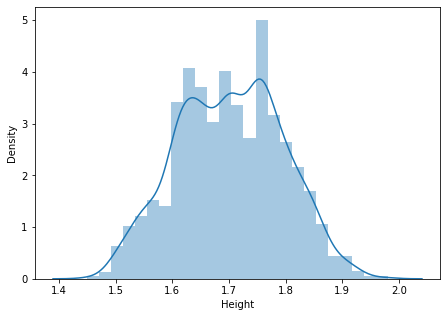

In [ ]:

fig = plt.figure(figsize = (16,5))

#distplot
ax1 = fig.add_subplot(121)
sns.distplot(data["Height"], kde=True)

Weight does not offer interesting observations. Distribution is more or less bi-modal 
the mean and the median are shifted to the left because of the larger number of people weighting 80 kg.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


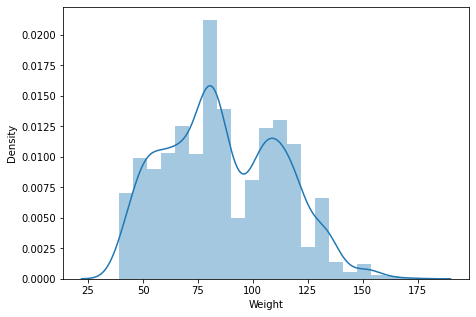

In [ ]:
fig = plt.figure(figsize = (16,5))

#distplot
ax1 = fig.add_subplot(121)
sns.distplot(data["Weight"], kde=True)

You would be suprise to know  about the strong corelation bewtween height and weight in section 3.7 while plotting heat map


**3.6 Corelation Heatmap**

You already know that if you have a data set with many columns, a good way to quickly check correlations among columns is by visualizing the correlation matrix as a heatmap. You can see the strong corelation between weight and height from the colour of the heatmap

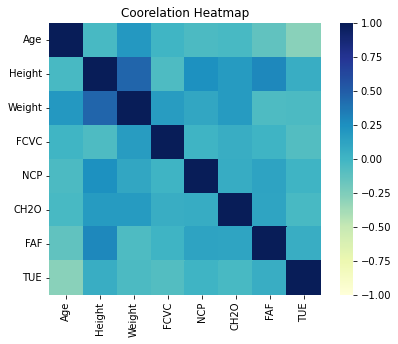

In [ ]:
fig = plt.figure(figsize=(15, 5))

# add subplot for one row 2 graphs first postion
ax1 = fig.add_subplot(121)


# set title 
ax1.title.set_text("Coorelation Heatmap")

#define plot
sns.heatmap(data.corr(), 
                 annot = False,                 
                 fmt='.1g', 
                 cmap="YlGnBu", 
                 vmin=-1, vmax=1, center= 0,                 
                 square="True",
                 ax=ax1)

Great! dark blue means positive, yellow  means negative. The stronger the color, the larger the correlation magnitude. Now looking at the chart above, think about the following question:

What’s the strongest and what’s the weakest correlated pair (except the main diagonal)?
(For understanding about what dose column denote refer to data dictionary)


# Analysis on Dependent Variable (Category of Obesity)

Normal, Overweight or Obese?
People, according to their Body mass index (BMI), are categorised as:

Underweight if BMI < 18.5


* Normal if BMI 18.5 - 24.9

* Overweight if BMI 25.0 - 29.9

* Obesity I if BMI 30.0 - 34.9

* Obesity II if BMI 35.0 to 39.9

* Obesity III if BMI > 40

Number of people per category is displayed below 


The plot shows the dataset is balanced; only "Obese Type I" class slightly outnumber the other categories.

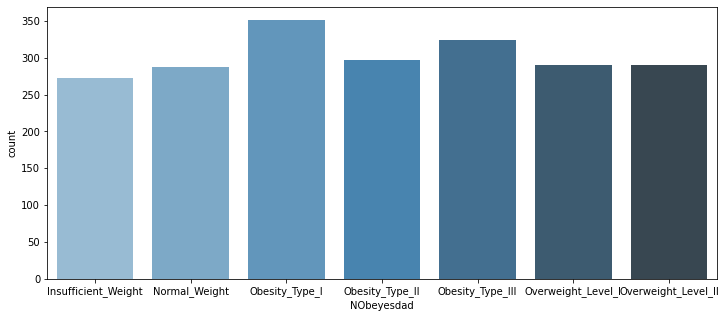

In [ ]:
fig = plt.figure(figsize=(12, 5))

sns.countplot(x='NObeyesdad',palette="Blues_d",data=data)


It is interesting to see how Overweight/Obesity interact with different categorical variables. The function below computes and plots this interaction.

In [ ]:
def cross_plot(dataset, lead_category, sup_category, order = None):
    """
    Function: Plots interaction between two categorical variables.
    
    Parameters: Dataset, lead category, suplemental category, and order of appearance (order is optional).
    """
    
    sns.countplot(x = lead_category, hue = sup_category, data = data, order = order, palette = "Blues_r")
    
    plt.show()

Women are more likely to have "Insufficient weight" than men. On the other hand, there are more obese men than women, save in the last, extreme obesity category.

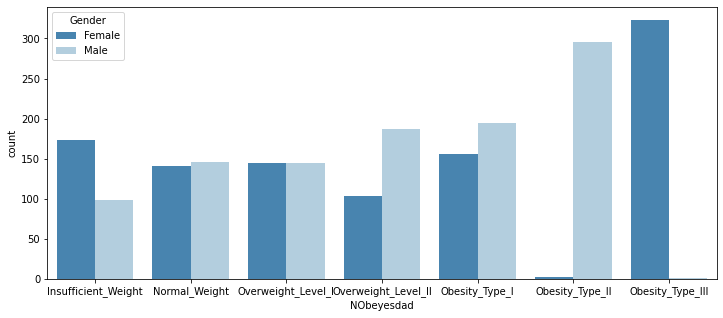

In [ ]:
plt.figure(figsize = (12, 5))
cross_plot(data, "NObeyesdad", "Gender", ["Insufficient_Weight", "Normal_Weight", 
                                          "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])

Overweight and family history

It seems obesity runs in the family. All those categorised as overweight or obese had family members suffering from weight problems.

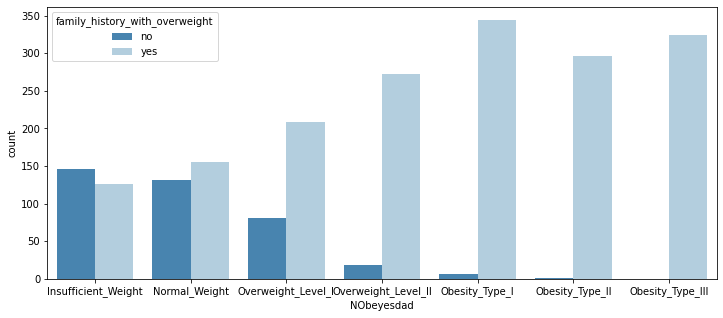

In [ ]:
plt.figure(figsize = (12, 5))
cross_plot(data, "NObeyesdad", "family_history_with_overweight", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", 
                                                                  "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])

Overweight and high calories food

Both normal weight and overweight/obese people consume high calories food. Perhaps food quantity makes the difference and affects body fats.

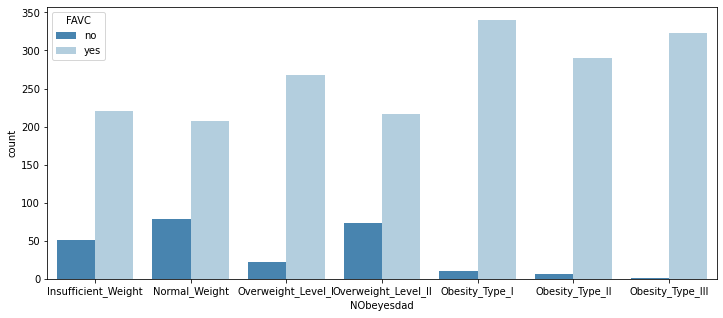

In [ ]:
plt.figure(figsize = (12, 5))
cross_plot(data, "NObeyesdad", "FAVC", ["Insufficient_Weight", "Normal_Weight",
                                                "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]) 

Overweight and food between meals

Weight of those who "frequently" or "always" get food between meals does not seem to be abnormal. Only people having snaks from time to time go into "Overweight" or "Obesity" categories.

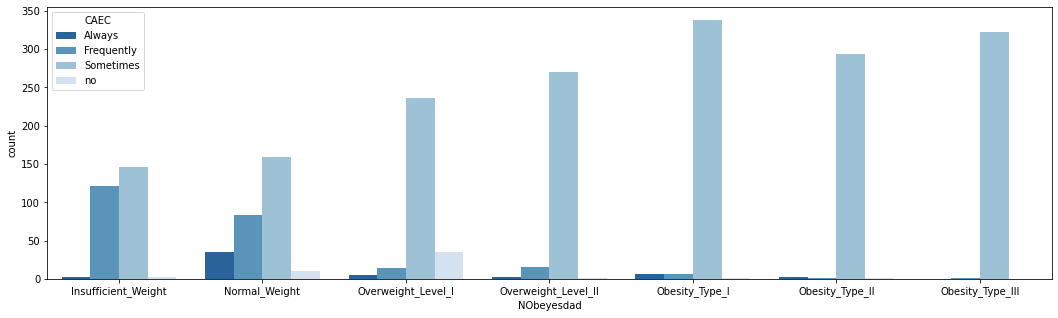

In [ ]:
plt.figure(figsize = (18, 5))
cross_plot(data, "NObeyesdad", "CAEC", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", 
                                                "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]) 

Overweight and smoking

It seems smoking is not a predictor or does not affect body weight. There is a tiny number of smokers who could be both normal and overweight.

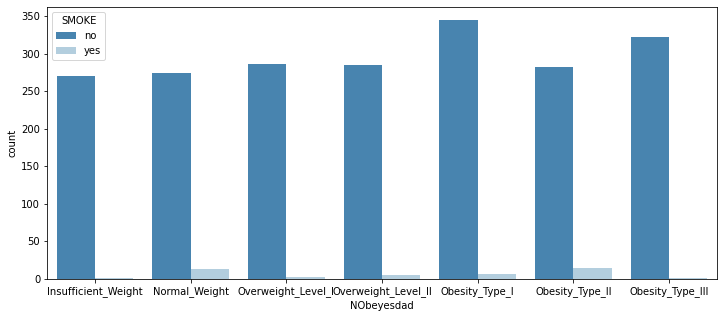

In [ ]:
plt.figure(figsize = (12, 5))
cross_plot(data, "NObeyesdad", "SMOKE", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I",
                                                 "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]) 

Overweight and monitoring calories
People who tend to monitor their calories intake are less likely to get excess weight.

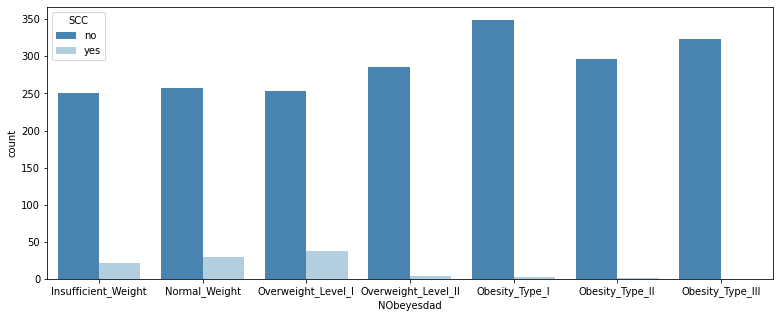

In [ ]:
plt.figure(figsize = (13, 5))
cross_plot(data, "NObeyesdad", "SCC", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I",
                                               "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]) 

Overweight and means of transport

Transportation seems does not (significantly) affect a person's weight. Both slim, normal and overweight people use public transport; all groups rely on cars as well


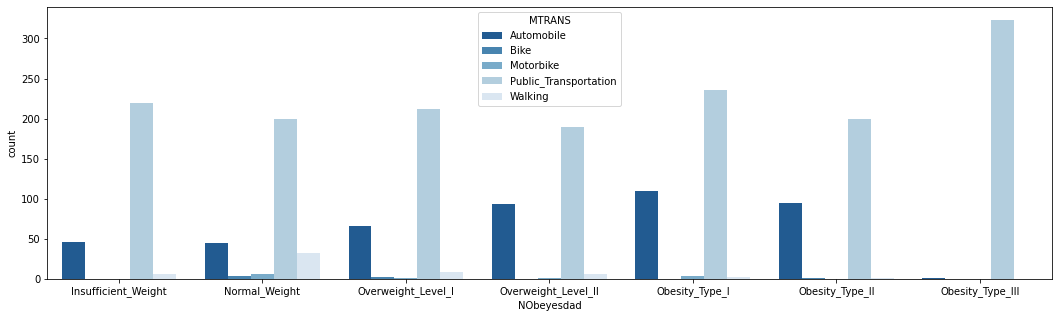

In [ ]:
plt.figure(figsize = (18, 5))
cross_plot(data, "NObeyesdad", "MTRANS", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", 
                                                  "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]) 

#CONCLUSION

**CONCLUSION**
1. There are no null values in dataset.
2. Most of the high corelation variables are not normaly distributed and they are following Bernoli Distribution.
3. Age is also spread over wide range of data.
4. Some feature can be dropped with some domain knowledge as they have very less corelation 
5. Women are more likely to have "Insufficient weight" than men. On the other hand, there are more obese men than women, save in the last, extreme obesity category.
6. Both normal weight and overweight/obese people consume high calories food. Perhaps food quantity makes the difference and affects body fats.
7. People who tend to monitor their calories intake are less likely to get excess weight.



This conclusion would be important during our model selection and buulding our model pipeline.

